<div style="background-color: #3FFFF; padding: 30px;"> <div style="text-align: center;">
    <h1 style="font-family: Arial, sans-serif; font-size: 30px; font-weight: bold; text-align: center; margin: 20px 0;">TASK 4:Sales Prediction using Python</h1>
<img src="https://www.embedded-robotics.com/wp-content/uploads/2022/04/Forecast-Sales-using-Machine-Learning.jpeg" alt="Hero image" style="width: 100%;">
</div> 

### Name: Ayush Verma
### Data Science Intern @CodeAlpha
### Student ID:CA/JU3/4720

## About the Dataset:

The advertising dataset [link](https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input) consists of sales of the products in 200 different markets. It also includes advertising budgets for the product in each of those markets for three different media: TV, radio, and newspapers. The dataframe with 200 rows and 4 variables are as follows:

- TV: a numeric vector indicating the advertising budget on TV.
- Radio: a numeric vector indicating the advertising budget on radio.
- Newspaper: a numeric vector indicating the advertising budget on newspaper.
- Sales: a numeric vector indicating the sales of the interest product.

## Objective:

The dataset has advertising data sales (in thousands of units) for a particular product advertising budgets (in thousands of dollars) for TV, radio, and newspaper media. On the basis of this data, we need to suggest a marketing plan for future sales that will result in high product sales. We have to create various regression models with a focus on robust performance. And the identify the optimal model based on to its balanced accuracy and generalization. So, we have to use this advertising dataset given in the task and analyse the predicted sales based on the given advertising expenditures using the best regression model. 

## Importing all the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np
import pandas as pd

# Data Viz
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go 

# ML Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Exploratory Data Analysis (EDA)

In [2]:
# load the data from csv file to Pandas DataFrame

sales_df = pd.read_csv(r'advertising.csv')

In [3]:
# load the data from csv file to Pandas DataFrame

sales_df = pd.read_csv(r'advertising.csv')

In [4]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
sales_df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
# Function to check number of rows and columns of dataset, number of missing values in each column,
# glimpse of the dataframe, statistical and important information about the dataset 

def analysis(data):
    print(f'Advertising Data Size  : {data.size}')
    print(f'\nShape of the dataframe: {data.shape[0]} rows and {data.shape[1]} columns')
    print("*" * 100)
    print("\nDisplaying the initial records of the dataset:")
    display(data.head())
    print("*" * 100)
    print("\nStatistical measures about the data:")
    display(data.describe())
    print("*" * 100)
    print("\nSome important information about the dataframe:\n")
    display(data.info())
    print("*" * 110)
    
data = sales_df
analysis(sales_df)

Advertising Data Size  : 800

Shape of the dataframe: 200 rows and 4 columns
****************************************************************************************************

Displaying the initial records of the dataset:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


****************************************************************************************************

Statistical measures about the data:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


****************************************************************************************************

Some important information about the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

**************************************************************************************************************


## Data Visualization

In [7]:
# Checking null values in the dataframe
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(sales_df)
result

,Missing Values,Percentage
TV,0,0.0%
Radio,0,0.0%
Newspaper,0,0.0%
Sales,0,0.0%


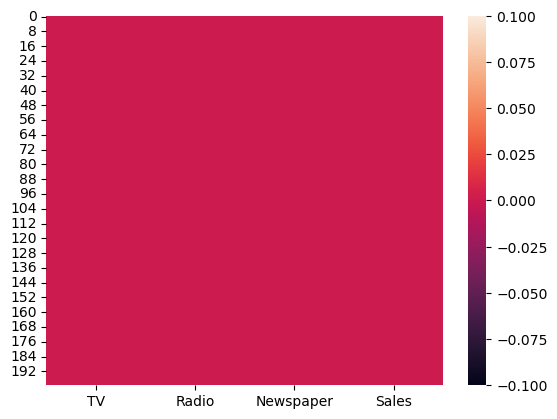

In [8]:
#Visualization of missing values
sns.heatmap(sales_df.isnull());

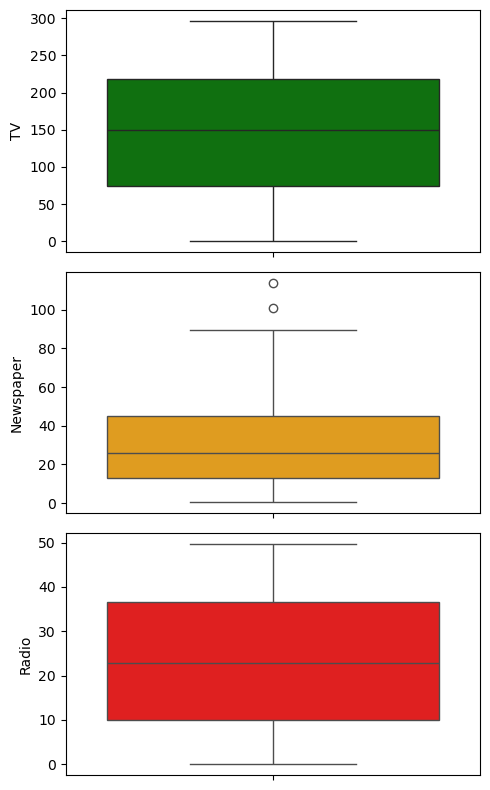

In [10]:
# Visualizing outliers using boxplots
fig, axs = plt.subplots(3, figsize=(5, 8))
plt1 = sns.boxplot(sales_df['TV'], ax=axs[0], color='Green')
plt2 = sns.boxplot(sales_df['Newspaper'], ax=axs[1], color='orange')
plt3 = sns.boxplot(sales_df['Radio'], ax=axs[2], color='red')
plt.tight_layout() 

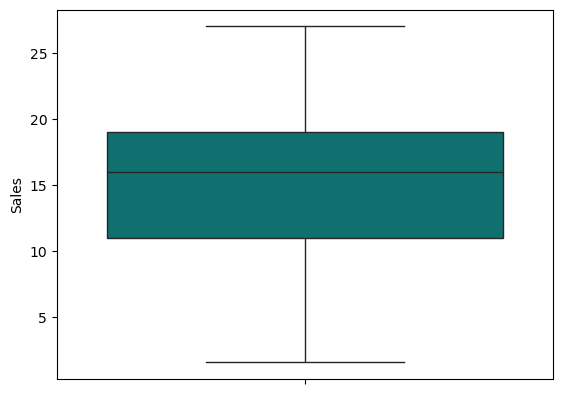

In [11]:
# Visualizing outliers for the target variable
sns.boxplot(sales_df['Sales'],color='teal')
plt.show()

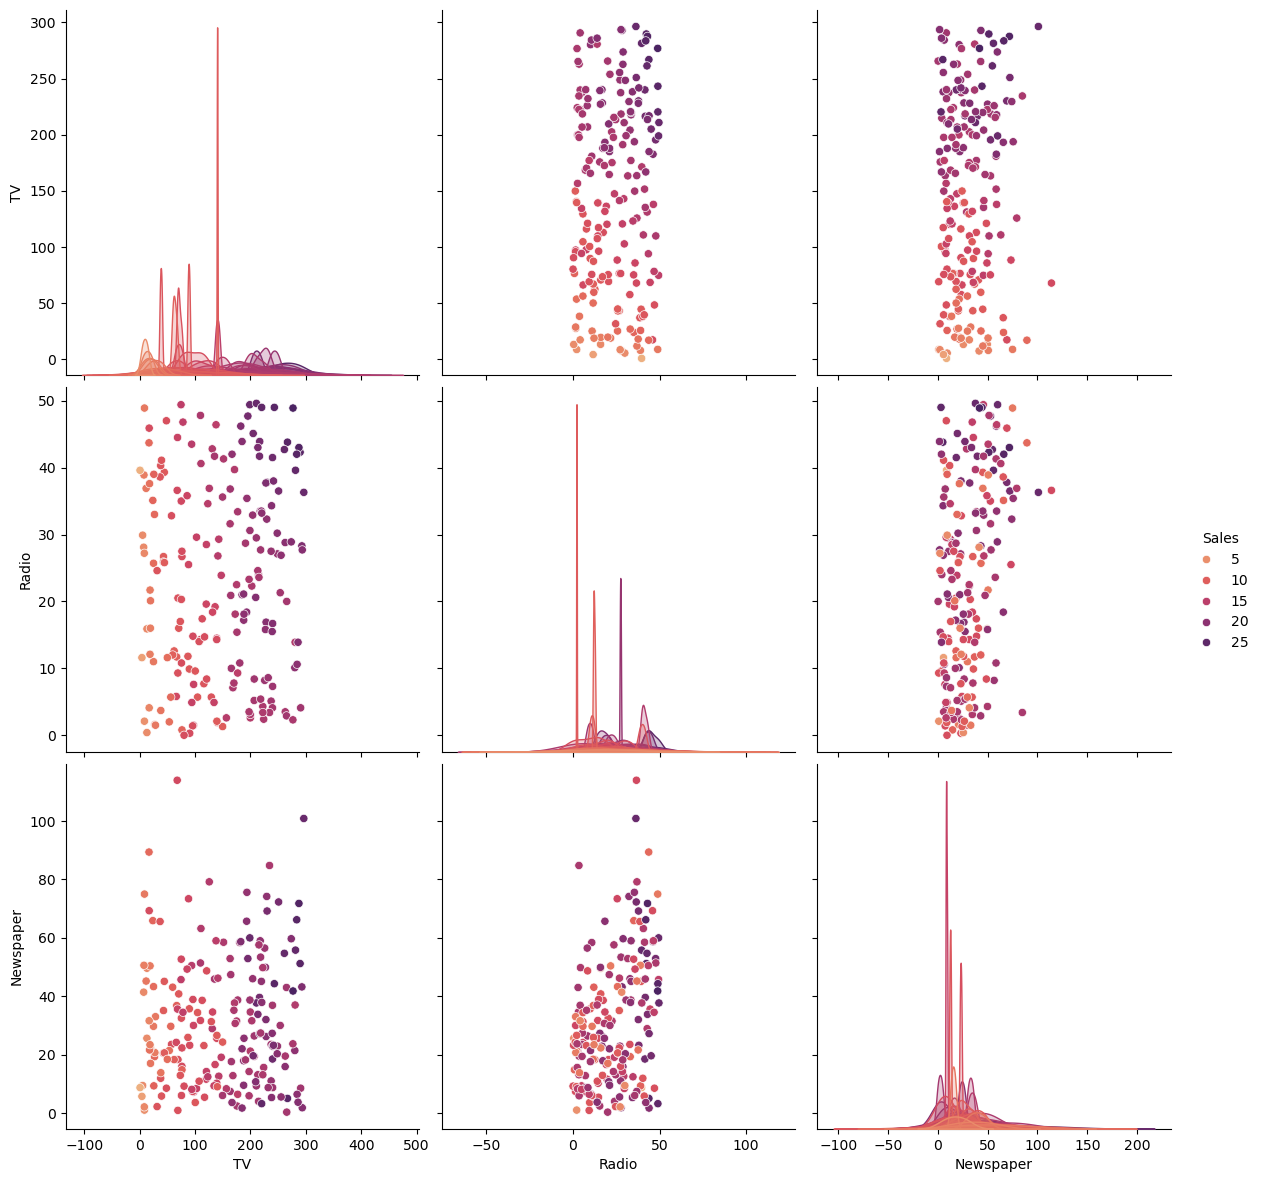

In [12]:
# using scatterplot to see how sales is related to the other variables 
sns.pairplot(sales_df, kind = 'scatter', aspect = 1, height = 4, palette = 'flare', hue='Sales')
plt.show()

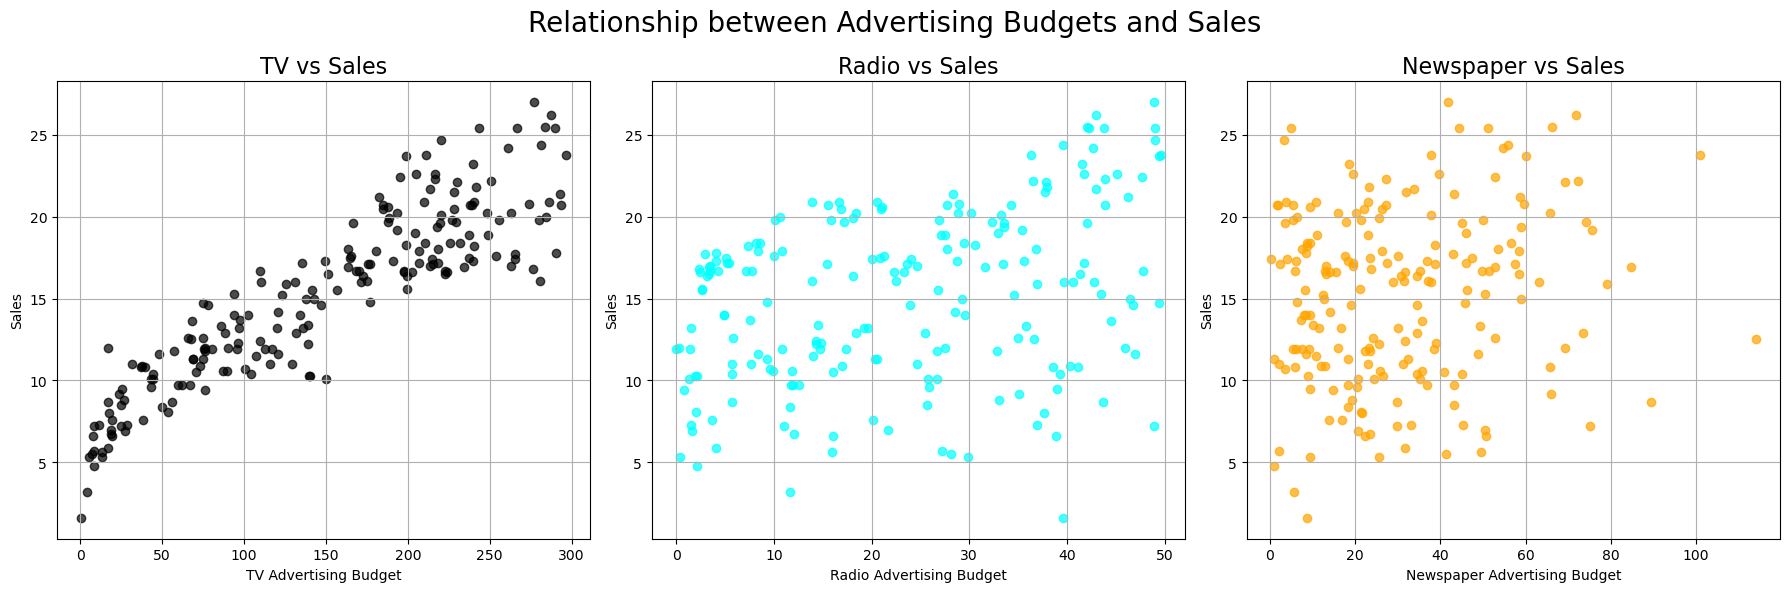

In [13]:
# Plot relationship between variables

plt.figure(figsize=(18,6))

# TV vs Sales
plt.subplot(1,3,1)
plt.scatter(sales_df['TV'],sales_df['Sales'], alpha=0.7, color='Black')
plt.title('TV vs Sales', fontsize=16)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)


# Radio Vs Sales
plt.subplot(1,3,2)
plt.scatter(sales_df['Radio'],sales_df['Sales'], alpha=0.7, color='Cyan')
plt.title('Radio vs Sales', fontsize=16)
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)


# Newspaper Vs Sales
plt.subplot(1,3,3)
plt.scatter(sales_df['Newspaper'],sales_df['Sales'], alpha=0.7, color='orange')
plt.title('Newspaper vs Sales', fontsize=16)
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)

plt.suptitle('Relationship between Advertising Budgets and Sales', fontsize=20)

plt.tight_layout()
plt.show();

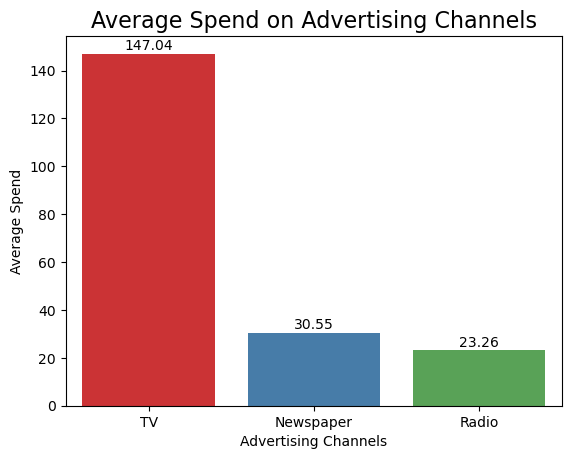

In [14]:
# Avgerage spend on advertising
avg_spend = sales_df[['TV','Newspaper','Radio']].mean()

colors = ['teal','orange','red']

ax=sns.barplot(x=avg_spend.index, y=avg_spend.values,palette='Set1', linewidth=0)

for i, v in enumerate(avg_spend.values):
    ax.text(i,v + 0.2, f'{v:.2f}', va='bottom',ha='center')


plt.title('Average Spend on Advertising Channels', fontsize=16)
plt.xlabel('Advertising Channels', fontsize=10)
plt.ylabel('Average Spend', fontsize=10)
ax.yaxis.grid(False)
plt.show()

## Correlation

In [15]:
#Checking correlation between variables
sales_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


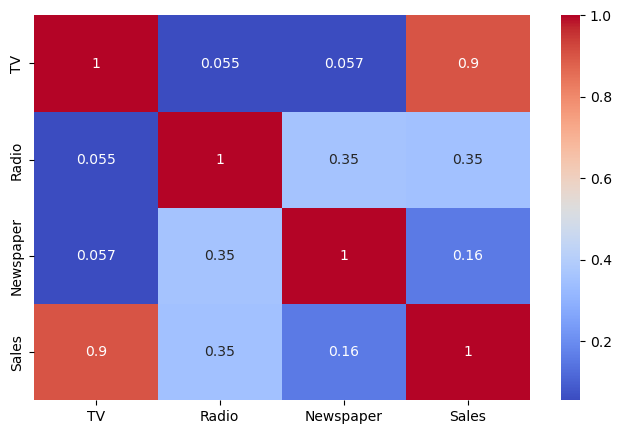

In [16]:
# Visualizing correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(sales_df.corr(), cmap="coolwarm", annot = True)
plt.show()

- TV and Sales: strong positive correlation - As the budget for TV advertising increases, Sales tend to increase.
- Radio and Sales: moderate positive correlation - Increasing Radio advertising spending is associated with an increase in Sales, but the relationship is not as strong as with TV.
- Newspaper and Sales: weak positive correlation - The impact of Newspaper advertising on Sales is weaker compared to TV and Radio.

## Data Preprocessing

In [17]:
##Checking for missing values in the dataframe
print(f'\nMissing values in each column: \n{sales_df.isnull().sum()} ')
print(f'\nTotal missing values in the dataframe: {sales_df.isnull().sum().sum()} ')


Missing values in each column: 
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64 

Total missing values in the dataframe: 0 


In [18]:
# Displaying the number of unique values for each column
for i in sales_df:
    print("No. of unique values in %s column are: %s" % (i, sales_df[i].nunique()))

No. of unique values in TV column are: 190
No. of unique values in Radio column are: 167
No. of unique values in Newspaper column are: 172
No. of unique values in Sales column are: 121


## Split the data into features (X) and target variable (y)

In [19]:
X = data[["TV", "Radio", "Newspaper"]]
y = data[['Sales']]

In [20]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [21]:
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [22]:
print((X.shape), (y.shape))

(200, 3) (200, 1)


## Splitting the data into Train and Test Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


# Model Training

## Building Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [27]:
My_models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'Decision Tree Regression','Random Forest Regression', 'Gradient Boosting', 'XGBoost Regression', 'KNN Regression']

MSE_Score = []

In [28]:
#Fit model
linear = LinearRegression()
linear.fit(X_train, y_train)

#Coefficient for all advertising media
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear.coef_[0][idx]))

The coefficient for TV is 0.054509270837219764
The coefficient for Radio is 0.1009453623929558
The coefficient for Newspaper is 0.004336646822034038


In [29]:
#Get Intercept value
intercept = linear.intercept_[0]
print("the intercept for our linear model is {}".format(intercept))

the intercept for our linear model is 4.714126402214131


In [30]:
#Predict the model
y_pred_train_linear = linear.predict(X_train)
y_pred_test_linear = linear.predict(X_test)

# Performance metrics

In [31]:
#Evaluate the model on the test data
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_linear))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_linear)/100)
linear_mse = metrics.mean_squared_error(y_test, y_pred_test_linear)
print("Mean Square Error (MSE) :", linear_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_linear)))
r_squared_train_linear = r2_score(y_train, y_pred_train_linear)
r_squared_test_linear = r2_score(y_test, y_pred_test_linear)
print("R-squared Score (Train) :", r_squared_train_linear)
print("R-squared Score (Test) :", r_squared_test_linear)

MSE_Score.append(round(linear_mse,3))

Mean Absolute Error (MAE) : 1.274826210954934
Mean Absolute Percent Error (MAPE) : 0.01274826210954934
Mean Square Error (MSE) : 2.9077569102710905
Root Mean Square Error (RMSE) : 1.7052146229349228
R-squared Score (Train) : 0.9001416005862131
R-squared Score (Test) : 0.9059011844150826


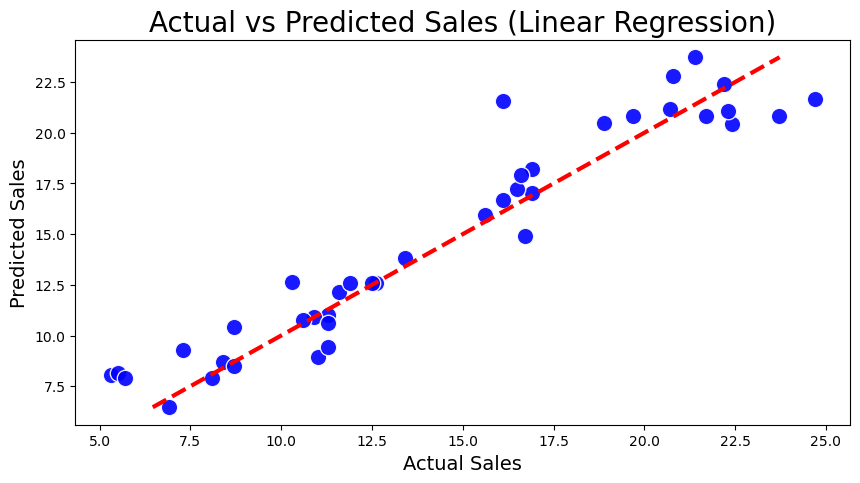

In [32]:
# Visualize Predicted Vs Actual Values

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_linear, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_linear), max(y_pred_test_linear)], [min(y_pred_test_linear), max(y_pred_test_linear)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Linear Regression)', fontsize=20);

## Regularisation Method

### Part 1: Lasso Regression model

In [33]:
#Fit model
from sklearn.linear_model import Lasso 
# exact zero or closure to zero
# penalty = 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Model :", (lasso.coef_))

Lasso Model : [0.05449934 0.10056182 0.00420248]


In [34]:
#Predict the model
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [35]:
lasso.intercept_

array([4.72840816])

#### Performance metrics

In [36]:
#Evaluate the model on the test data
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_lasso))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_lasso)/100)
lasso_mse = metrics.mean_squared_error(y_test, y_pred_test_lasso)
print("Mean Square Error (MSE) :", lasso_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lasso)))
print("R-squared Score (Train) :", r2_score(y_train, y_pred_train_lasso))
print("R-squared Score (Test) :", r2_score(y_test, y_pred_test_lasso))

MSE_Score.append(round(lasso_mse,3))

Mean Absolute Error (MAE) : 1.274175466196396
Mean Absolute Percent Error (MAPE) : 0.01274175466196396
Mean Square Error (MSE) : 2.9093222519953077
Root Mean Square Error (RMSE) : 1.705673547896932
R-squared Score (Train) : 0.9001396346012004
R-squared Score (Test) : 0.9058505279101615


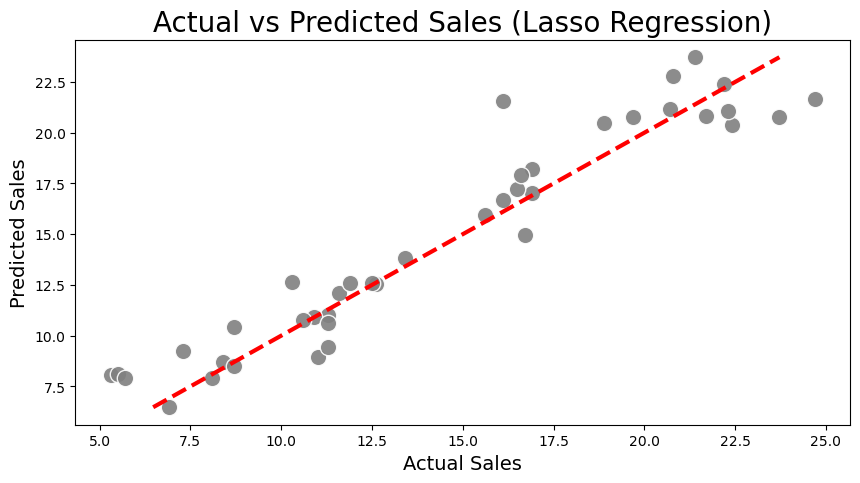

In [37]:
# Visualize Predicted Vs Actual Values

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_lasso, color='Gray', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_lasso), max(y_pred_test_lasso)], [min(y_pred_test_lasso), max(y_pred_test_lasso)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Lasso Regression)', fontsize=20);

### Part 2 : Ridge Regression (L2- Regularization)

In [38]:
# Always this method is used. Because Lasso completely removes the variable.
# closure to zero but not exact zero
# penalty - 0.3
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print("Ridge Model :", (ridge.coef_))

Ridge Model : [[0.05450926 0.10094435 0.00433691]]


In [39]:
#Predict the model
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [40]:
ridge.coef_

array([[0.05450926, 0.10094435, 0.00433691]])

#### Performance metrics

In [41]:
#Evaluate the model on the test data
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_ridge))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_ridge)/100)
ridge_mse = metrics.mean_squared_error(y_test, y_pred_test_ridge)
print("Mean Square Error (MSE) :", ridge_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ridge)))
print("R-squared Score (Train) :", r2_score(y_train, y_pred_train_ridge))
print("R-squared Score (Test) :", r2_score(y_test, y_pred_test_ridge))

MSE_Score.append(round(ridge_mse,3))

Mean Absolute Error (MAE) : 1.2748273938014774
Mean Absolute Percent Error (MAPE) : 0.012748273938014774
Mean Square Error (MSE) : 2.907768669219756
Root Mean Square Error (RMSE) : 1.705218070869458
R-squared Score (Train) : 0.9001416005791467
R-squared Score (Test) : 0.9059008038801286


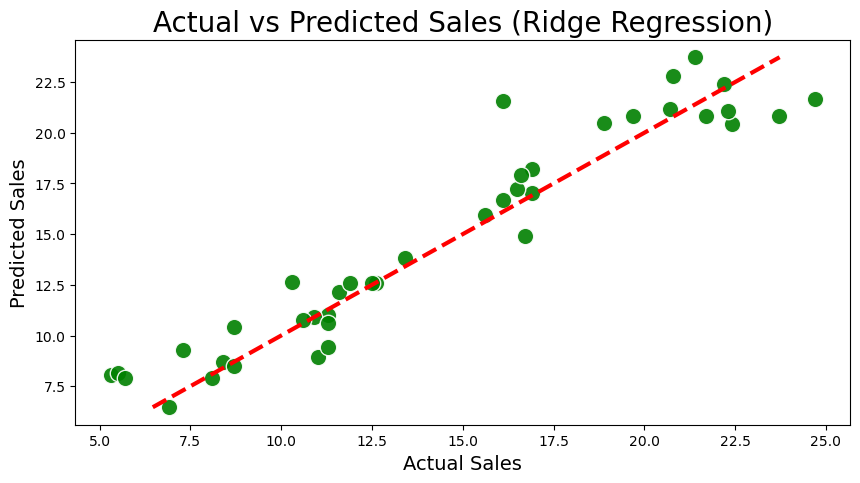

In [42]:
# Visualize Predicted Vs Actual Values

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_ridge, color='Green', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_ridge), max(y_pred_test_ridge)], [min(y_pred_test_ridge), max(y_pred_test_ridge)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Ridge Regression)', fontsize=20);

### Part 3: ElasticNet Regression model

In [43]:
#Fit model
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [44]:
#Predict the model
y_pred_train_elastic = elastic.predict(X_train)
y_pred_test_elastic = elastic.predict(X_test)

In [45]:
elastic.coef_

array([0.05450536, 0.10068627, 0.00433431])

#### Performance metrics

In [46]:
#Evaluate the model on the test data
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_elastic))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_elastic)/100)
elastic_mse = metrics.mean_squared_error(y_test, y_pred_test_elastic)
print("Mean Square Error (MSE) :", elastic_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_elastic)))
print("R-squared Score (Train) :", r2_score(y_train, y_pred_train_elastic))
print("R-squared Score (Test) :", r2_score(y_test, y_pred_test_elastic))

MSE_Score.append(round(elastic_mse,3))

Mean Absolute Error (MAE) : 1.2747994437791328
Mean Absolute Percent Error (MAPE) : 0.012747994437791328
Mean Square Error (MSE) : 2.909902936168488
Root Mean Square Error (RMSE) : 1.7058437607730925
R-squared Score (Train) : 0.9001410405342483
R-squared Score (Test) : 0.9058317362110576


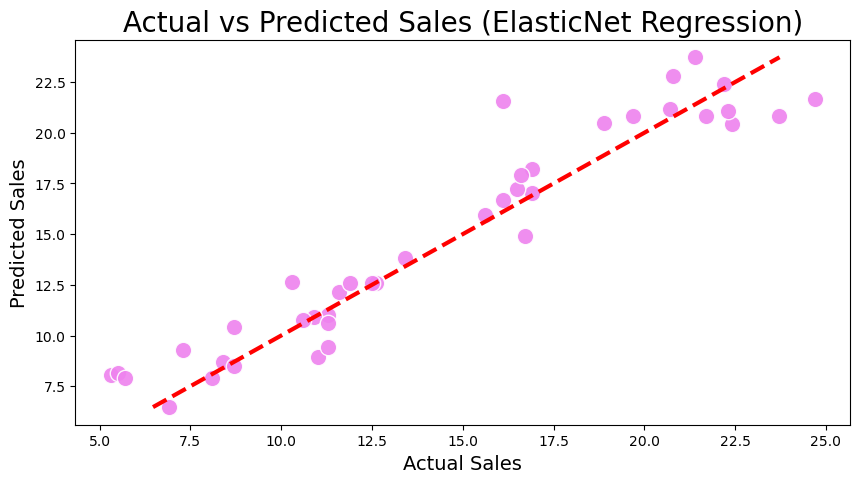

In [47]:
# Visualize Predicted Vs Actual Values

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_ridge, color='violet', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_elastic), max(y_pred_test_elastic)], [min(y_pred_test_elastic), max(y_pred_test_elastic)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (ElasticNet Regression)', fontsize=20);

In [48]:
#Training all the Regression models together

#Fit model - Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Fit model - Decision Tree Regression
DTree_model = DecisionTreeRegressor(max_depth = 6)
DTree_model.fit(X_train, y_train)

#Fit model - Random Forest Regression
RF_model = RandomForestRegressor(n_estimators = 500, random_state = 1, max_depth = 6)
RF_model.fit(X_train, y_train)

#Fit model - Gradient Boosting Regressor
GDBoosting_model = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 123)
GDBoosting_model.fit(X_train, y_train)     

#Fit model - XGBoost Regression
XGBoost_model = xgb.XGBRegressor(random_state = 111, max_depth = 2)
XGBoost_model.fit(X_train, y_train)

#Fit model - KNN Regression
KNN_model = KNeighborsRegressor(n_neighbors = 5)
KNN_model.fit(X_train, y_train)

KNeighborsRegressor()

In [49]:
# Make prediction and check accuracy for Linear Regression
linear_test_prediction = linear_model.predict(X_test)
r2_score_linear = r2_score(y_test, linear_test_prediction)

# Make prediction and check accuracy for Decision Tree Regression
DTree_test_prediction = DTree_model.predict(X_test)
r2_score_DTree = r2_score(y_test, DTree_test_prediction)

# Make prediction and check accuracy for Random Forest Regression
RF_test_prediction = RF_model.predict(X_test)
r2_score_RF = r2_score(y_test, RF_test_prediction)

# Make prediction and check accuracy for Gradient Boosting Regressor
GDBoosting_test_prediction = GDBoosting_model.predict(X_test)
r2_score_GDBoosting = r2_score(y_test, GDBoosting_test_prediction)

# Make prediction and check accuracy for XGBoost Regression
XGBoost_test_prediction = XGBoost_model.predict(X_test)
r2_score_XGBoost = r2_score(y_test, XGBoost_test_prediction)

# Make prediction and check accuracy for KNN Regression
KNN_test_prediction = KNN_model.predict(X_test)
r2_score_KNN = r2_score(y_test, KNN_test_prediction)

In [50]:
regressor_scores = [
    ("Linear Regression", r2_score_linear),
    ("Decision Tree Regressor", r2_score_DTree),
    ("Random Forest Regressor", r2_score_RF),
    ("Gradient Boosting Regressor", r2_score_GDBoosting),
    ("XGBoost Regressor", r2_score_XGBoost),
    ("KNN Regressor", r2_score_KNN),
]

# Sort the regressor accuracy scores in descending order based on the R-squared score
sorted_regressor_scores = sorted(regressor_scores, reverse=True, key=lambda x: x[1])

# Print the sorted regressor scores
for regressor, score in sorted_regressor_scores:
    print(f"{regressor}\n R-squared score: {score}\n")

Gradient Boosting Regressor
 R-squared score: 0.959697246280149

Random Forest Regressor
 R-squared score: 0.9515967014242255

XGBoost Regressor
 R-squared score: 0.9391695261001587

Linear Regression
 R-squared score: 0.9059011844150826

KNN Regressor
 R-squared score: 0.8991773755626823

Decision Tree Regressor
 R-squared score: 0.8960762591975687



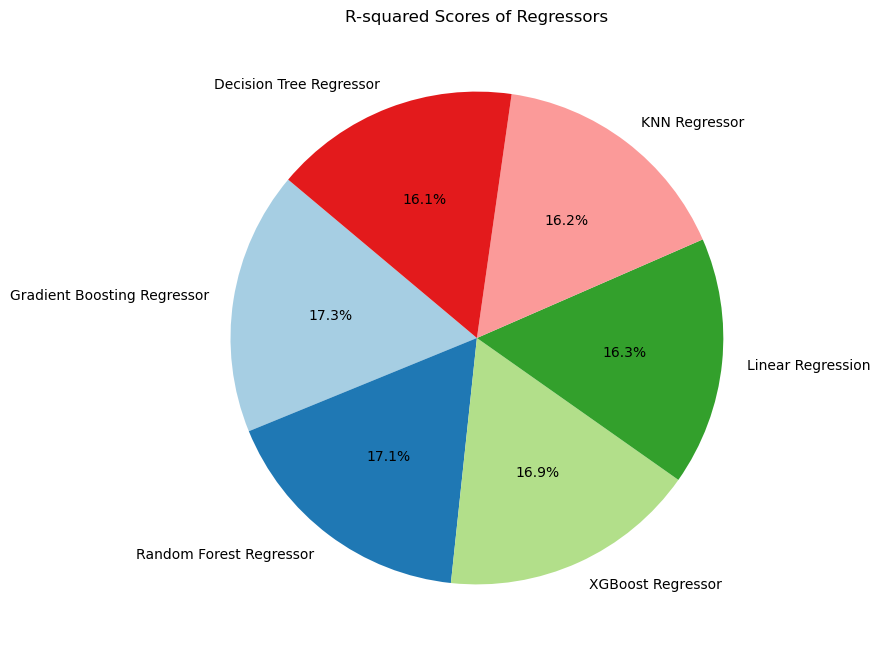

In [51]:
# Extract names and scores from the sorted regressor scores
regressors = [regressor for regressor, _ in sorted_regressor_scores]
scores = [score for _, score in sorted_regressor_scores]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(scores, labels=regressors, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("R-squared Scores of Regressors")
plt.show()

Among all the models evaluated, Gradient Boosting Regression model performed the best with around 96% accuracy, followed by Random Forest Regression model with 95% accuracy and then XGBoost Regression model with 93.9% accuracy. 

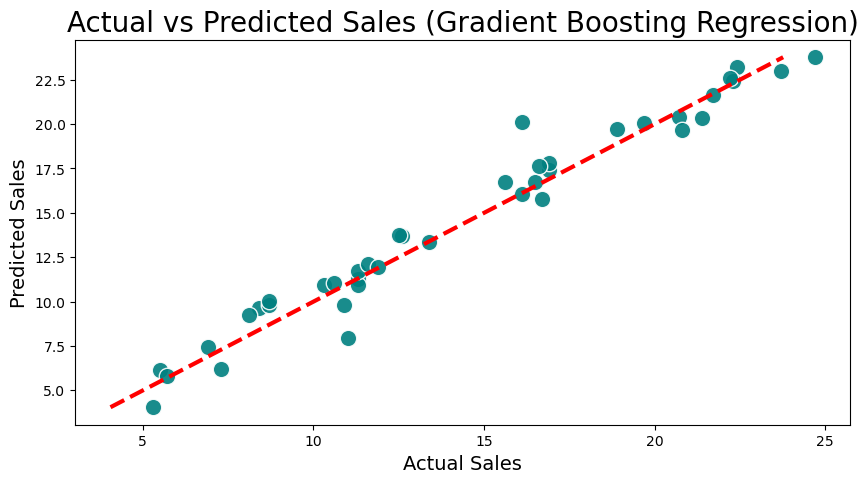

In [52]:
# Visualize Predicted Vs Actual Values for Gradient Boosting Regression

plt.figure(figsize=(10,5))
plt.scatter(y_test, GDBoosting_test_prediction, color='teal', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(GDBoosting_test_prediction), max(GDBoosting_test_prediction)], [min(GDBoosting_test_prediction), max(GDBoosting_test_prediction)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Gradient Boosting Regression)', fontsize=20);

#### Performance metrics for all the models

In [53]:
#MSE score for Decision Tree Regression
DecisionTree_mse = metrics.mean_squared_error(y_test, DTree_test_prediction)
MSE_Score.append(round(DecisionTree_mse,3))

#MSE score for Random Forest Regression
RandomForest_mse = metrics.mean_squared_error(y_test, RF_test_prediction)
MSE_Score.append(round(RandomForest_mse,3))

#MSE score for Gradient Boosting Regression
GDBoosting_mse = metrics.mean_squared_error(y_test, GDBoosting_test_prediction)
MSE_Score.append(round(GDBoosting_mse,3))

#MSE score for XGBoost Regression
XGBoost_mse = metrics.mean_squared_error(y_test, XGBoost_test_prediction)
MSE_Score.append(round(XGBoost_mse,3))

#MSE score for KNN Regression
KNN_mse = metrics.mean_squared_error(y_test, KNN_test_prediction)
MSE_Score.append(round(KNN_mse,3))

In [54]:
# MSE scores comparison for all the models
final_MSE = pd.DataFrame()
final_MSE.index = My_models
final_MSE['MSE'] = MSE_Score

#sorting MSE scores from highest to lowest 
final_MSE.sort_values(by="MSE", ascending=False)

,MSE
Decision Tree Regression,3.211
KNN Regression,3.116
ElasticNet Regression,2.910
Lasso Regression,2.909
Linear Regression,2.908
Ridge Regression,2.908
XGBoost Regression,1.880
Random Forest Regression,1.496
Gradient Boosting,1.245


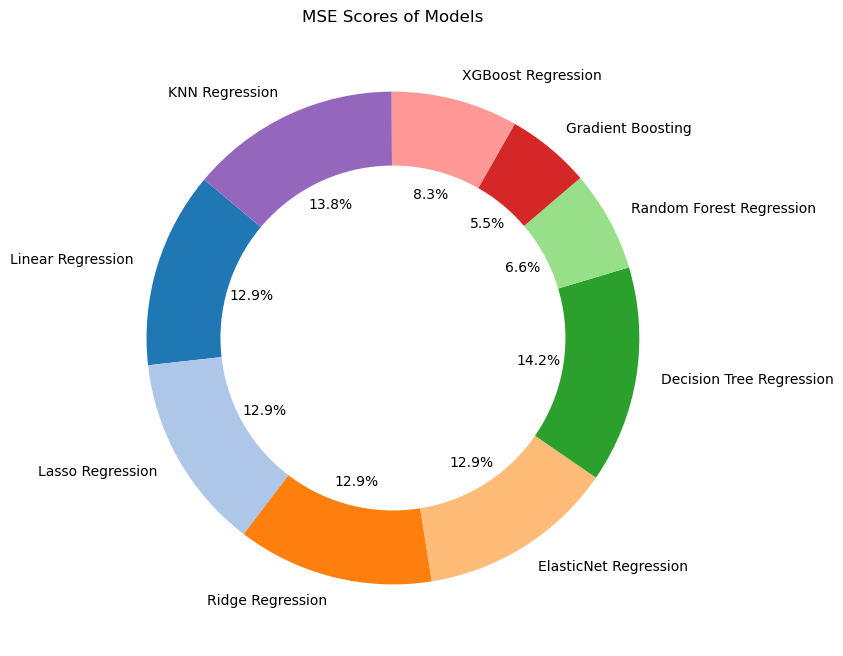

In [55]:
# Extract model names and MSE scores
models = final_MSE.index
mse_scores = final_MSE['MSE']

# Plot the donut chart
plt.figure(figsize=(8, 8))
plt.pie(mse_scores, labels=models, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
# Add a white circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("MSE Scores of Models")
plt.show()

From the above MSE results, we can see that, Gradient Boosting Regression model performed the best with lowest Mean Squared Error (MSE) of 1.245 compared to other model's MSE scores.

### Deciding to go with Gradient Boosting Regression model, since it has maximum accuracy with less mean squared error. 

## ML-Ops: Operationalizing a Machine Learning Model

In [56]:
# Inference from hypothetical data
TV = int(input('Enter the amount spent on TV Advertising: '))
Radio = int(input('Enter the amount spent on Radio Advertising: '))
Newspaper = float(input('Enter the amount spent on Newspaper Advertising: '))

Enter the amount spent on TV Advertising:  180
Enter the amount spent on Radio Advertising:  49
Enter the amount spent on Newspaper Advertising:  23.4


In [57]:
# Predict on unseen data
input_list = [TV, Radio, Newspaper]
input_list

Sales_Prediction = GDBoosting_model.predict([input_list])
print(f'The predicted Sales based on the given advertising expenditures is {Sales_Prediction[0]:,.2f}, the model has an associated Mean Squared Error of {GDBoosting_mse:.3f}.')

The predicted Sales based on the given advertising expenditures is 21.19, the model has an associated Mean Squared Error of 1.245.


## Saving Gradient Boosting Regression model and generating the output file

In [58]:
#Predicting the sales for output file
final_result = pd.DataFrame(GDBoosting_model.predict(X))
final_result = final_result.rename(columns = {0 : "Sales_Predicted"})
final_result

,Sales_Predicted
0,22.171203
1,10.797260
2,11.189745
3,16.977519
4,17.927487
...,...
195,7.960206
196,13.349888
197,15.814860
198,25.761561


In [59]:
#Generating the output file with predicted sales
final_model = pd.concat([sales_df, pd.DataFrame(final_result)], axis = 1)
final_model

,TV,Radio,Newspaper,Sales,Sales_Predicted
0,230.1,37.8,69.2,22.1,22.171203
1,44.5,39.3,45.1,10.4,10.797260
2,17.2,45.9,69.3,12.0,11.189745
3,151.5,41.3,58.5,16.5,16.977519
4,180.8,10.8,58.4,17.9,17.927487
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,7.960206
196,94.2,4.9,8.1,14.0,13.349888
197,177.0,9.3,6.4,14.8,15.814860
198,283.6,42.0,66.2,25.5,25.761561


In [60]:
final_model.to_csv(r"Sales_Prediction.csv")

In [61]:
#Displaying final accuracy score and MSE
print("Final Accuracy Score:",r2_score(final_model['Sales'], final_model['Sales_Predicted']))
print("Final Mean Squared Error:",metrics.mean_squared_error(final_model['Sales'], final_model['Sales_Predicted']))

Final Accuracy Score: 0.9857950585569059
Final Mean Squared Error: 0.3946121333426059


## Conclusion:
- In analysing the Sales Prediction Dataset, I navigated through data visualization, preprocessing, and machine learning model selection.
- The characteristics of the dataset, including the nature of relationships and noise, influence model performance. Simple models like Linear Regression and Regularization methods like Lasso,Ridge are best when dealing with linear relationships.
- We have observed that there is a small Numbers of outliers in the Newspapers category, while the other categories have no outliers. And since Newspaper category have less corelation with target, no outliers treatment is required.
- Among the models evaluated, Gradient Boosting Regression model performed the best with around 96% accuracy and lowest Mean Squared Error (MSE) of 1.245, followed by Random Forest Regression model with 95% accuracy and Mean Squared Error (MSE) of 1.496 and XGBoost Regression model with 93.9% accuracy and Mean Squared Error (MSE) of 1.880. 
- Hence, Gradient Boosting Regression is identified as the optimal model based on to its balanced accuracy and generalization with accurate sales predictions.